# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 아버지와 아들의 키 - Galton

In [9]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [10]:
df = df[df.Gender == 'M']
df = df[['Father','Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


- 'Height' 컬럼을 'Son'으로 변경

In [11]:
df.rename(columns={'Height':'Son'}, inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


- inch --> cm (2.54)로 변환

In [12]:
df = df*2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 그리기

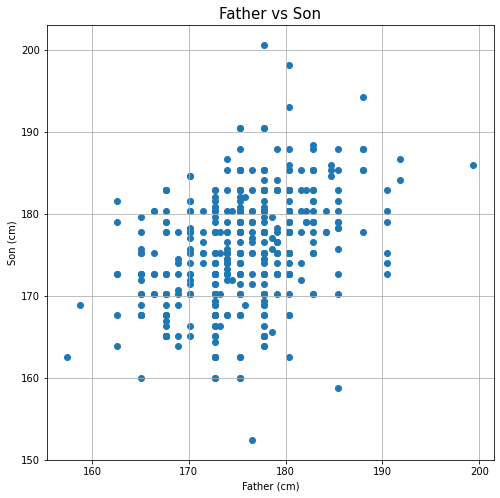

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.xlabel('Father (cm)')
plt.ylabel('Son (cm)')
plt.title('Father vs Son', fontsize=15)
plt.grid()
plt.show()

- Numpy

In [14]:
fp1 = np.polyfit(df.Father, df.Son, 1)
fp1

array([ 0.44774792, 97.17763701])

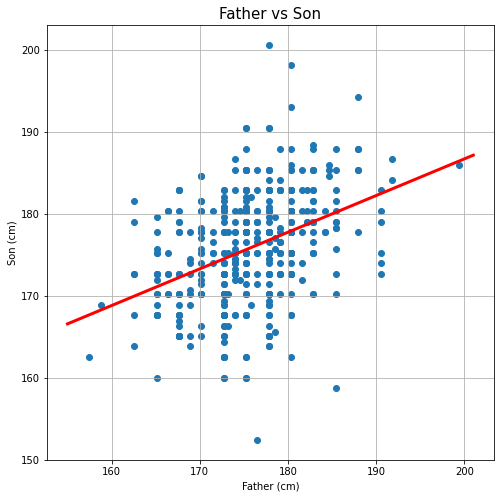

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.plot([155,201], [155*fp1[0]+fp1[1], 201*fp1[0]+fp1[1]], 'r-', lw=3)
plt.xlabel('Father (cm)')
plt.ylabel('Son (cm)')
plt.title('Father vs Son', fontsize=15)
plt.grid()
plt.show()

- Scikit-Learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
df.Father.shape

(465,)

In [18]:
# X는 2차원이어야 함
X = df.Father.values.reshape(-1,1)
y = df.Son.values

In [19]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# 기울기, 절편
lr.coef_[0], lr.intercept_

(0.4477479176030257, 97.17763700739341)

In [22]:
# 잔차 제곱의 합 (RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [23]:
# R squared - 성능 평가 요소
lr.score(X, y)

0.15312927478307048